**Reading data**

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("/content/IntegratedData.csv")

df.head()


,date,county,state,fips,cases,deaths,daily_cases,daily_deaths,day_of_week,is_weekend,is_holiday,retail_recreation,grocery_pharmacy,parks,transit,workplaces,residential
0,2021-01-01,autauga,alabama,1001,4239.0,50.0,0.0,0.0,4.0,0.0,1.0,-46.0,-28.0,NaN,NaN,-77.0,28.0
1,2021-01-02,autauga,alabama,1001,4268.0,50.0,29.0,0.0,5.0,1.0,0.0,-10.0,-5.0,NaN,NaN,-20.0,7.0
2,2021-01-03,autauga,alabama,1001,4305.0,50.0,37.0,0.0,6.0,1.0,0.0,-12.0,-3.0,-10.0,NaN,-14.0,6.0
3,2021-01-04,autauga,alabama,1001,4336.0,50.0,31.0,0.0,0.0,0.0,0.0,4.0,2.0,NaN,NaN,-26.0,8.0
4,2021-01-05,autauga,alabama,1001,4546.0,50.0,210.0,0.0,1.0,0.0,0.0,2.0,3.0,NaN,NaN,-22.0,8.0


**Check Missing Values**

In [9]:
df.isna().sum()


,0
date,0
county,0
state,0
fips,0
cases,0
deaths,0
daily_cases,0
daily_deaths,0
day_of_week,0
is_weekend,0


**Check duplicate rows**

In [10]:
df.duplicated().sum()


np.int64(0)

**No. of rows and columns**

In [11]:
print("Shape:", df.shape)
print("Rows:", df.shape[0])
print("Columns:", df.shape[1])


Shape: (935442, 17)
Rows: 935442
Columns: 17


**Data type of columns**

In [5]:
df.dtypes


,0
date,object
county,object
state,object
fips,int64
cases,float64
deaths,float64
daily_cases,float64
daily_deaths,float64
day_of_week,float64
is_weekend,float64


**Descriptive summary statistics**

In [12]:
df.describe()


,date,fips,cases,deaths,daily_cases,daily_deaths,day_of_week,is_weekend,is_holiday,retail_recreation,grocery_pharmacy,parks,transit,workplaces,residential
count,935442,935442.000000,9.354420e+05,935442.000000,935442.000000,935442.000000,935442.000000,935442.000000,935442.000000,591076.000000,524133.000000,223770.000000,347338.000000,924893.000000,573705.000000
mean,2021-07-02 02:09:25.213877504,30381.671809,1.361759e+04,224.119963,35.551823,0.503279,2.831458,0.237142,0.045818,0.743892,5.677679,26.125799,-1.767437,-19.445143,4.871254
min,2021-01-01 00:00:00,1001.000000,3.100000e+01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-100.000000,-100.000000,-96.000000,-100.000000,-100.000000,-29.000000
25%,2021-04-02 00:00:00,18109.000000,1.907000e+03,34.000000,0.000000,0.000000,1.000000,0.000000,0.000000,-10.000000,-4.000000,-15.000000,-25.000000,-25.000000,2.000000
50%,2021-07-02 00:00:00,29111.000000,3.982000e+03,71.000000,4.000000,0.000000,3.000000,0.000000,0.000000,0.000000,5.000000,12.000000,-3.000000,-18.000000,4.000000
75%,2021-10-01 00:00:00,45063.000000,9.944000e+03,165.000000,20.000000,0.000000,4.000000,0.000000,0.000000,11.000000,14.000000,53.000000,17.000000,-11.000000,7.000000
max,2021-12-31 00:00:00,56045.000000,1.697286e+06,27637.000000,99926.000000,1258.000000,6.000000,1.000000,1.000000,409.000000,332.000000,670.000000,478.000000,120.000000,46.000000
std,NaN,15317.169609,4.327626e+04,737.095930,238.707742,4.134265,1.943614,0.425331,0.209090,19.620619,16.689547,60.644016,33.757475,13.628810,4.522237


**Univariate Analysis**

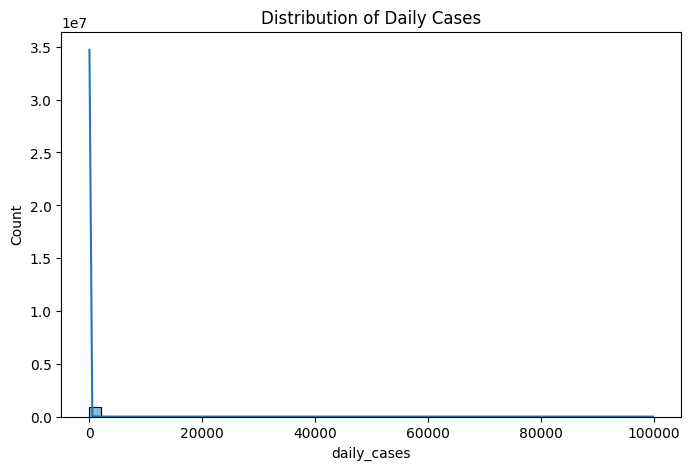

In [13]:
plt.figure(figsize=(8,5))
sns.histplot(df['daily_cases'], bins=50, kde=True)
plt.title("Distribution of Daily Cases")
plt.show()


**Distribution of Revenue**

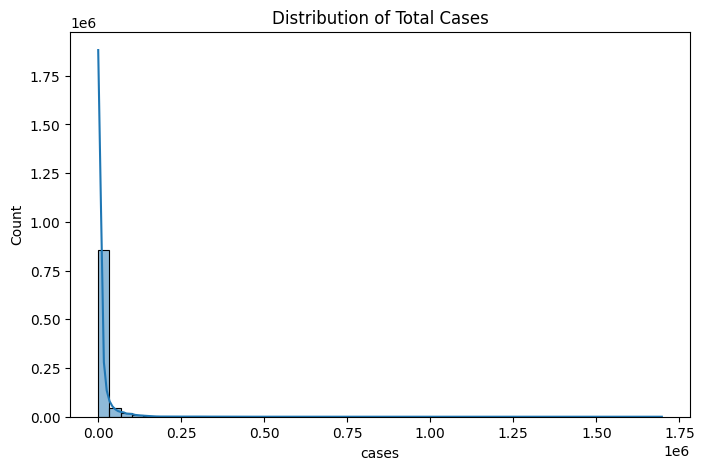

In [14]:
plt.figure(figsize=(8,5))
sns.histplot(df['cases'], bins=50, kde=True)
plt.title("Distribution of Total Cases")
plt.show()


**Bivariate Analysis**

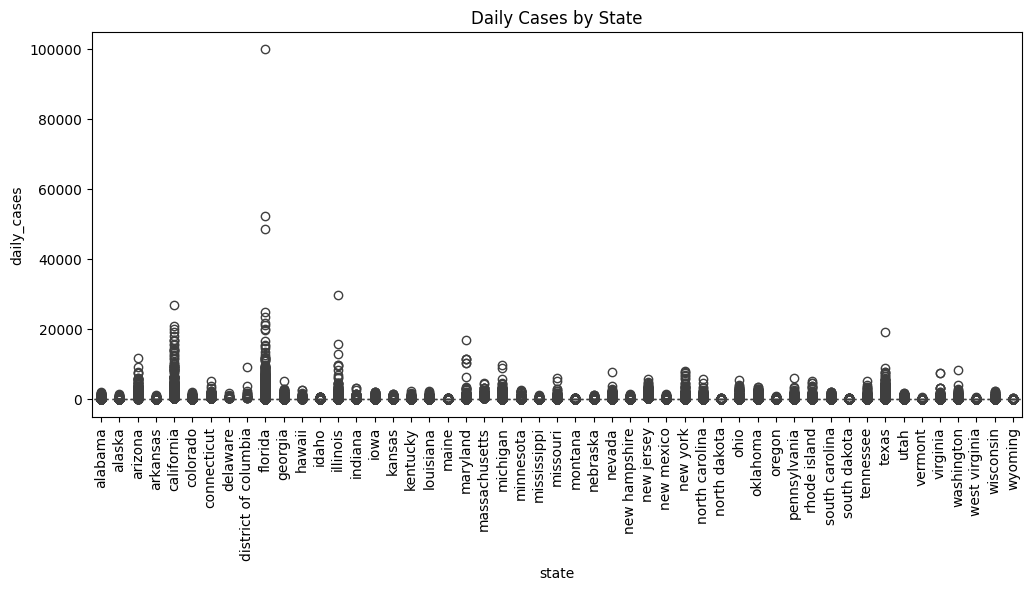

In [15]:
plt.figure(figsize=(12,5))
sns.boxplot(x='state', y='daily_cases', data=df)
plt.xticks(rotation=90)
plt.title("Daily Cases by State")
plt.show()


**Boxes vs Revenue Relationship**

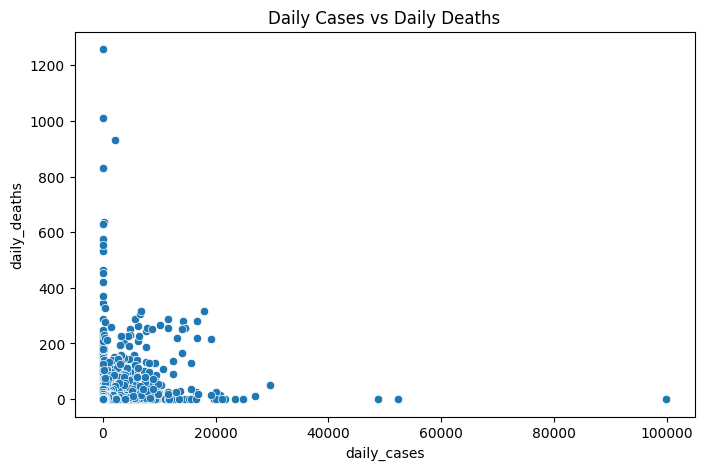

In [16]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='daily_cases', y='daily_deaths', data=df)
plt.title("Daily Cases vs Daily Deaths")
plt.show()


**Correlation Matrix**

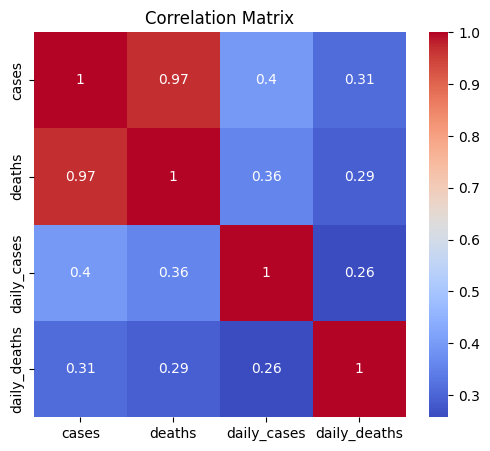

In [17]:
plt.figure(figsize=(6,5))
sns.heatmap(
    df[['cases','deaths','daily_cases','daily_deaths']].corr(),
    annot=True,
    cmap='coolwarm'
)
plt.title("Correlation Matrix")
plt.show()


**Time-Based Analysis**

In [18]:
df['date'] = pd.to_datetime(df['date'])


In [19]:
df['month'] = df['date'].dt.to_period('M')

monthly_cases = df.groupby('month')['daily_cases'].sum()


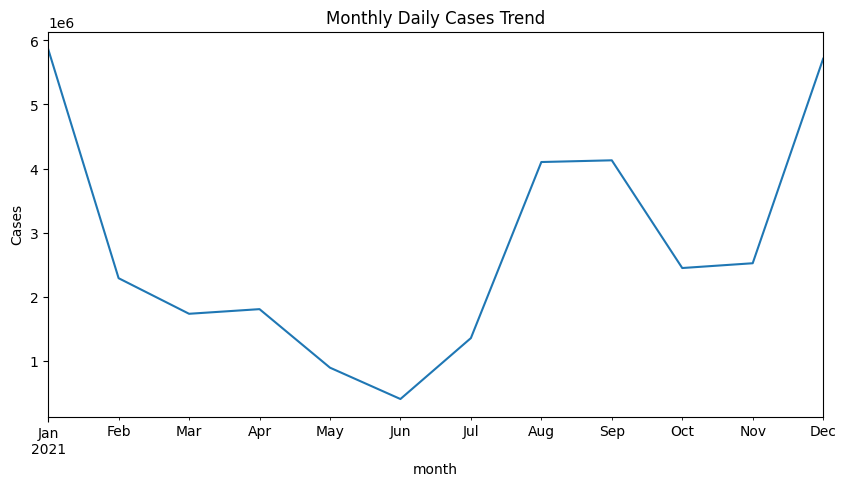

In [20]:
plt.figure(figsize=(10,5))
monthly_cases.plot()
plt.title("Monthly Daily Cases Trend")
plt.ylabel("Cases")
plt.show()
